# Breast C



## Attributes

1. Sample code number         
2. Clump Thickness            
3. Uniformity of Cell Size    
4. Uniformity of Cell Shape   
5. Marginal Adhesion          
6. Single Epithelial Cell Size
7. Bare Nuclei                
8. Bland Chromatin            
9. Normal Nucleoli            
10. Mitoses                   
11. Class:                        
  * 2 for benign
  * 4 for malignant



In [2]:
import pandas as pd
import numpy as np

attributes = [
    "SampleCode"
    ,"ClumpThickness"
    ,"UniformityOfCellSize"   
    ,"UniformityOfCellShape"   
    ,"MarginalAdhesion"          
    ,"SingleEpithelialCellSize"
    ,"BareNuclei"                
    ,"BlandChromatin"            
    ,"NormalNucleoli"            
    ,"Mitoses"                   
    ,"Class"
]

classes = {
    2: "benign",
    4: "malignant"
}

bcw = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
    names=attributes,
    index_col="SampleCode",
    na_values="?"
)
X = pd.DataFrame(bcw)

y = pd.DataFrame(bcw["Class"])
y["ClassName"] = y.apply(lambda row: classes.get(row.Class), axis=1)

X = X.drop(columns=["Class"])
X

,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
SampleCode,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1
1002945,5,4,4,5,7,10.0,3,2,1
1015425,3,1,1,1,2,2.0,3,1,1
1016277,6,8,8,1,3,4.0,3,7,1
1017023,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2.0,1,1,1
841769,2,1,1,1,2,1.0,1,1,1
888820,5,10,10,3,7,3.0,8,10,2


In [3]:
import matplotlib.pyplot as plt

def plot_scatter(X, fig, ax, dim=('C1','C2')):
    colors = ['r', 'b']
    
    for i, c in enumerate(classes.keys()):
        class_name = classes.get(c)
        ax.scatter(
            X[X['Class'] == c][dim[0]], 
            X[X['Class'] == c][dim[1]],  
            c=colors[i], cmap=plt.cm.Set1, label=class_name, edgecolor='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    

## Normalization

In [15]:
# Fill NaN data
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(X)

# Normalize dataset
#from sklearn.preprocessing import StandardScaler
#X_std = StandardScaler().fit_transform(X_imp)
# No normalization needed. All values are already scaled properly (1-10)
X_std = pd.DataFrame(X_imp,index=X.index.values)
X_std

,0,1,2,3,4,5,6,7,8
1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


## PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca, index=X.index.values)

X_pca['Class'] = y['Class']
X_pca.columns = ['C1','C2','Class']
X_pca

,C1,C2,Class
1000025,-4.442791,0.106032,2
1002945,4.822188,-4.814076,2
1015425,-4.602250,-0.577144,2
1016277,5.147664,3.412215,2
1017023,-4.077746,-0.043665,2
...,...,...,...
776715,-4.937294,-0.401331,2
841769,-5.923211,0.249083,2
888820,10.330764,7.207352,4
897471,6.450916,2.472048,4


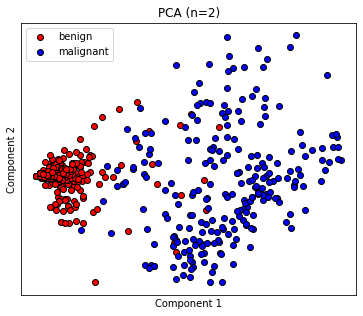

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('PCA (n=2)') 

plot_scatter(X_pca, fig, ax)

plt.legend()
plt.show()

## MDS

In [18]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_std)
X_mds = pd.DataFrame(X_mds, index=X.index.values)

X_mds['Class'] = y['Class']
X_mds.columns = ['C1','C2','Class']
X_mds

,C1,C2,Class
1000025,2.642576,-3.740524,2
1002945,-0.845131,7.137785,2
1015425,4.061730,-2.107785,2
1016277,-7.420859,-1.455795,2
1017023,2.887620,-2.356646,2
...,...,...,...
776715,4.306020,-2.346919,2
841769,5.478353,-3.459175,2
888820,-13.452748,-1.114023,4
897471,-8.216279,0.352746,4


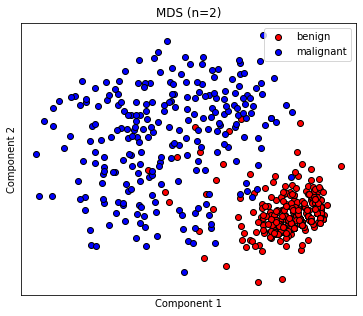

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('MDS (n=2)') 

plot_scatter(X_mds, fig, ax)

plt.legend()
plt.show()

## t-SNE

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)
X_tsne = pd.DataFrame(X_tsne, index=X.index.values)

X_tsne['Class'] = y['Class']
X_tsne.columns = ['C1','C2','Class']
X_tsne

,C1,C2,Class
1000025,14.071877,3.516061,2
1002945,1.948142,-23.189798,2
1015425,10.586773,12.510563,2
1016277,-9.954329,-21.454792,2
1017023,17.393585,-5.412548,2
...,...,...,...
776715,-2.140880,9.022528,2
841769,-7.130138,23.534630,2
888820,-14.480846,-23.164467,4
897471,-10.140448,-25.217674,4


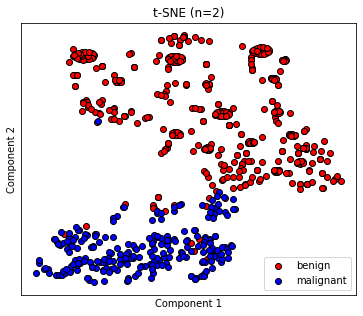

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('t-SNE (n=2)') 

plot_scatter(X_tsne, fig, ax)

plt.legend()
plt.show()
